<a href="https://colab.research.google.com/github/liumOazed/Neural_Network_With_Tensorflow/blob/main/01_neural_network_regression_with__tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in Tensorflow

There are many definitions for a regression problems, but in our case we will simplify it: 
Predicting a numerical variable based on some other combination of variables,... even shorter predicting a number.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


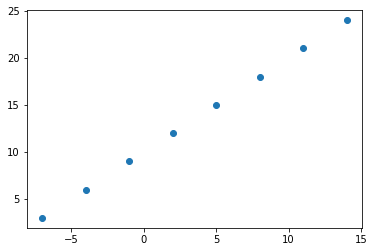

In [ ]:
# Creating data to view it
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in Tensorflow:

1. **Creating a model** -  define the input and output layers, as well as hidden layers of a deep learning model
2. **Compiling a model** - define the loss function(in other words the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics( what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find the pattrens between X & y (features and labels)
                                                                                                                              

In [ ]:
# Set random seed
tf.random.set_seed = 42

In [ ]:
# 1.create a model using sequential API
model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(1)
])

# 2. COmpile the model
model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),
              metrics= ["mae"]) # SGD is short for stochastic gradient descent


# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 1s 504ms/step - loss: 17.4517 - mae: 17.4517
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 17.1704 - mae: 17.1704
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 16.8892 - mae: 16.8892
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 16.6079 - mae: 16.6079
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 16.3267 - mae: 16.3267


In [ ]:
# Try make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[-10.724537]], dtype=float32)

In [ ]:
y_pred+9

array([[-1.7245369]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layers.

2. **Compiling a model** - Here we might the optimaztion function or perhaps the learning rate of set_optimization function.

3. **Fitting a model** - Here we might change the number of epochs (Train for longer) or give the model more examples to learn from.   

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs =100)

Epoch 1/100
1/1 [==============================] - 0s 298ms/step - loss: 9.9854 - mae: 9.9854
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8529 - mae: 9.8529
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7204 - mae: 9.7204
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5879 - mae: 9.5879
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4554 - mae: 9.4554
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3229 - mae: 9.3229
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1904 - mae: 9.1904
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0579 - mae: 9.0579
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9254 - mae: 8.9254
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7929 - mae: 8.7929
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6

In [ ]:
# Lets see if our model doing better
model.predict([17.0])

array([[29.771]], dtype=float32)

In [ ]:
# Lets re rebuild our model

# Create the model
model= tf.keras.Sequential([
      tf.keras.layers.Dense(50, activation=None),
      tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss= tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(learning_rate=0.01)
              , metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 407ms/step - loss: 13.2671 - mae: 13.2671
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6293 - mae: 12.6293
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9882 - mae: 11.9882
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3409 - mae: 11.3409
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6851 - mae: 10.6851
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0178 - mae: 10.0178
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.3357 - mae: 9.3357
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6359 - mae: 8.6359
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.9153 - mae: 7.9153
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1711 - mae: 7.1711
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

array([[26.64012]], dtype=float32)

## Evaluating a model

In practice a typical workflow you go through when building a neural network is:

``` Build a model -> Fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.. ```



When it comes to evaluation 3 words you should remember...:
Its Visualize, visulaize and visualize

Its a good idea to visualize:

* The data - What data we are working with? What does it look like?
* The model itself - WHat does our model look like
* The gtraining of a model - So how does a model performs while it learns?
* The predictions - How did the prediction lined up against the ground truth (the original labels)

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

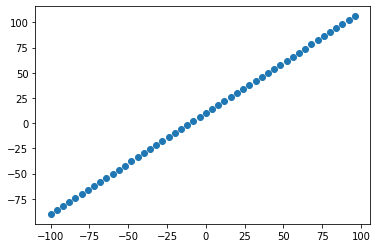

In [ ]:
# Visulaize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The three sets

* **Training set** - model learns from this data. typically 70-80% of the total data
* **Validation set** - The model gets tuned on this data. (This is where u tweak different things). This is typically 10-15% of the data available
* **Test set** - The model gets evaluted on this data to test what it has learned. This set is typically 10-15 % of the total data availbale.


In [ ]:
# Check the length of samples we have
len(X)

50

In [ ]:
# Split the data into train and test set
X_train = X[:40] # this is 80% of the data
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len (y_train), len(y_test)

(40, 10, 40, 10)

### Visulaizing the data

Now we got our data in training and testing sets.... lets visulaize again 

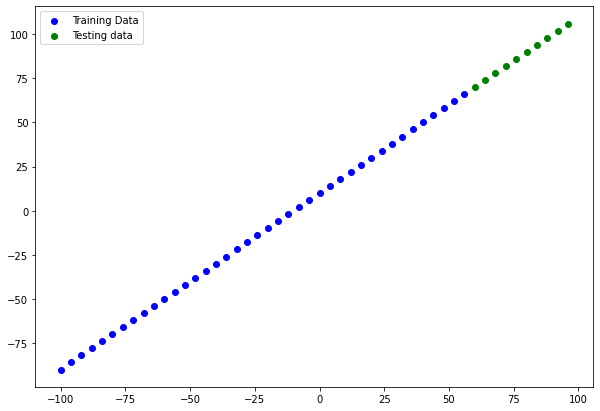

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c ='b', label='Training Data')

# plot testing data in green
plt.scatter(X_test, y_test, c='g', label= "Testing data") 
plt.legend();

In [ ]:
# Lets have a lookout how to build a neural network

# 1. Create model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae", 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# #3. Fit the model

# model.fit(X_train, y_train, epochs=100)

### Visulaize the model


In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Lets create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed = 42

In [ ]:
from tensorflow.python.eager.monitoring import Metric
# 1. create a model (same as above )

model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name= "input_layer"),
   tf.keras.layers.Dense(1, name = "output_layer")
])

# 2. Compile the model (same as above)

model_1.compile(loss= "mae", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Is the total number of parameters exist in the model. (The total number of perameters are how many different patterns our model is going to try and learn within the relationship between X and y data)
* Trainable params - This are the parameters (patterns) the model can update as it trains.
* Non-trainable params - This params aren't updated during training. This is typical when you bring in already learn pattern or parameters from other model during **transfer learning**. 

In [ ]:
# Lets fit our model to the training data
model_1.fit(X_train, y_train, epochs=100, verbose= 0)

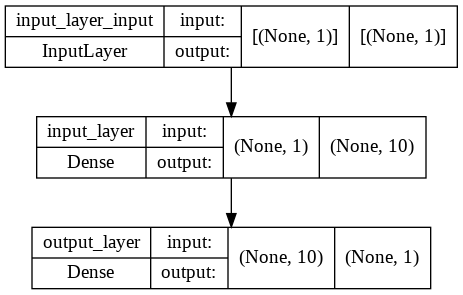

In [ ]:
# One more way to visualize our model
from tensorflow.keras.utils import plot_model

plot_model(model=model_1, show_shapes=True)

### Visualizing our model prediction

To visualize your models prediction its often a good idea to plot them against the ground truth labels.

Often you will see this in the form of `y_test` or `y_truth` again `y_preds`. (ground truth vs model predictions)

In [ ]:
# Make some predictions
y_pred = model_1.predict(X_test)
y_pred

array([[ 70.525375],
       [ 74.548035],
       [ 78.5707  ],
       [ 82.59337 ],
       [ 86.616035],
       [ 90.638695],
       [ 94.66136 ],
       [ 98.68403 ],
       [102.706696],
       [106.729355]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting function
def plot_prediction(train_data = X_train,
                    train_labels= y_train,
                    test_data= X_test,
                    test_labels= y_test,
                    predictions = y_pred):
  
  """Plots training and test data and compares predictions against ground truth """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Testing data")
  # Plot prediction
  plt.scatter(test_data, predictions, c="r", label="Predicted labels")
  # Show the legend
  plt.legend();





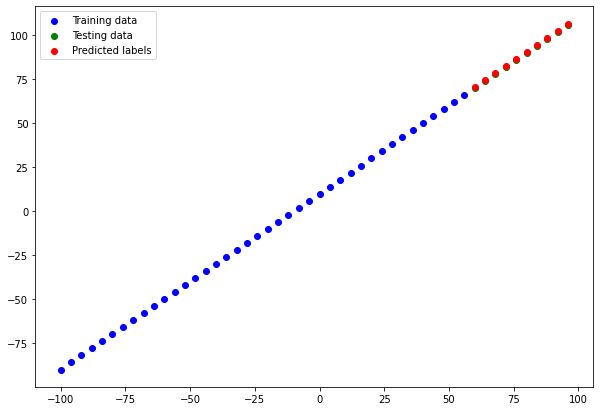

In [ ]:
plot_prediction()

### Evaluating our model with regression evaluation matrix

Depending on the problem you are working on, there will be different evaluation matrix to evaluate ur models performance

Sice we are working on a regression problem, two of the main metrics is-
* MAE - Mean absolute error. Which basically  is on average how wrong is each of my models predictions.
* MSE - Mean squared error. WHich is squared the avg errors and find out the avg.

In [ ]:
# Evaluate the model on test set
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.6274 - mae: 0.6274


[0.6273651123046875, 0.6273651123046875]

In [ ]:
# Calcualte the mean squared error
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.5797  , 14.471179, 12.17172 , 10.681326, 10.      , 10.127739,
       11.064545, 12.810417, 15.365356, 18.729355], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred = tf.constant(y_pred)

In [ ]:
y_pred = tf.squeeze(y_pred)

In [ ]:
# Calculate again the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.6273651>

In [ ]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.525375,  74.548035,  78.5707  ,  82.59337 ,  86.616035,
        90.638695,  94.66136 ,  98.68403 , 102.706696, 106.729355],
      dtype=float32)>

In [ ]:
# Calculate mean squared error
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.397825>

In [ ]:
# Function for mae and mse

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

### Saving our model

Saving our model allows us to use our model outside google colab (or wherever they are trained). Such as web application or mobile app.

There are two main formats we can save our model to:

1. The saved model format
2. HDF5 model format


In [ ]:
# Save a model using saved model format
model_1.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
model_1.save("best_model.h5")

### Loading in a saved model

In [ ]:
# Load in saved model format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
loaded_SavedModel_format_pred

array([[ 70.525375],
       [ 74.548035],
       [ 78.5707  ],
       [ 82.59337 ],
       [ 86.616035],
       [ 90.638695],
       [ 94.66136 ],
       [ 98.68403 ],
       [102.706696],
       [106.729355]], dtype=float32)

In [ ]:
model_1preds = model_1.predict(X_test)

In [ ]:
loaded_SavedModel_format_pred == model_1preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true = y_test, y_pred = loaded_SavedModel_format_pred) == mae(y_true=y_test, y_pred= model_1preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Loading the model using .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model.h5')
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5_model.predict(X_test) == model_1.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a file from google colab

If u want to download a file from google colab:

1. you can go to the file tab and right click on the file that u are after and cick download
2. Use code


In [ ]:
# Download a file from google colab
from google.colab import files
files.download("/content/best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### A larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)

In [ ]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y (features and labels)
X = insurance_one_hot.loc[ : , insurance_one_hot.columns != 'charges']
y = insurance_one_hot['charges']

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Create training and testing from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network
tf.random.set_seed= 42

# 1. Create a model
insurance_model = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = "mae", optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Check the data of the insurance model with test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6031.2153 - mae: 6031.2153


[6031.21533203125, 6031.21533203125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now the model doesn't look good lets improve it

In [ ]:
# To try and improve our model we will run 2 experiments
# Experiment 1

# Build a neural network
tf.random.set_seed= 42

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = "mae", optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# 3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4801.9307 - mae: 4801.9307


[4801.9306640625, 4801.9306640625]

In [ ]:
# Experiment 2
# Using callback early stopping
# Build a neural network
tf.random.set_seed= 42

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = "mae", optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# 3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=500, callbacks=[callback], verbose=0)

In [ ]:
# Insurance model 3 evaluation
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3567.1067 - mae: 3567.1067


[3567.106689453125, 3567.106689453125]

Text(0.5, 0, 'epochs')

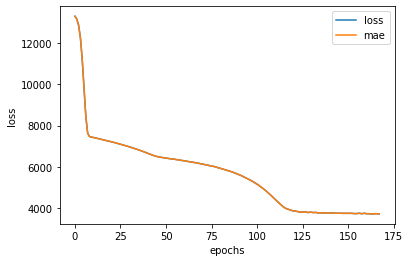

In [ ]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing Data (Normalization & Standardization)

In terms of scaling values, neural networks prefer normalization

If u r not sure which to use, u can use both and see which one performs better.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Read the insurance df
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### To Prepare our data we need to borrow some classes from sklearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in columns between 0 an 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # handle unknown: any column encoder doesn't know just ignore
)

# create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random state so that the split happens exactly the same

# Fit column transformer to our training data( If we do it later it will be cheating. Cause it will meant we are using data from future to transform)
ct.fit(X_train)

# Transform training and testing using normalization and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


NameError: ignored

In [ ]:
# What does our data look like?
X_train_normal[0]

In [ ]:
X_train.shape, X_train_normal.shape

In [ ]:
# Time to build a neural network model
tf.random_seed = 42 # as much reproducibility as possible

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. Create the model

insurance_model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(20),
        tf.keras.layers.Dense(30),
        tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
insurance_model_4.compile(loss="mae", optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics = ["mae"])

# 3. Fit the model
history_1 = insurance_model_4.fit(X_train_normal, y_train, callbacks=[callback] , epochs=500, verbose=1)

In [ ]:
# model evaulation
insurance_model_4.evaluate(X_test_normal, y_test)

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("mae")
plt.xlabel("epochs")

In [ ]:
insurance_model_4.summary()

In [ ]:
X['age'].plot(kind= "hist")

In [ ]:
X['bmi'].plot(kind="hist")

In [ ]:
X['children'].value_counts()